## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Ignore Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the files

In [3]:
# read data in pandas dataframe
df = pd.read_csv('train.csv',low_memory=False)
pf = pd.read_csv('test.csv',low_memory=False)

In [4]:
df.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [5]:
pf.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3


In [6]:
df.columns = [x.strip().replace('+AF8-', '_') for x in df.columns]

In [7]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


## Data Exploration

In [8]:
df.sort_values(by=['num_passengers'])

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
172579,172579,1,264.0,264.0,4.7,0.5,0.00,04/04/2017 05:27:36 PM,04/04/2017 05:27:36 PM,0.0,0,1.0,99.0,N,0,0.3,28
487868,487868,2,28.0,28.0,5.26,0,0.00,04/03/2017 06:37:30 PM,04/03/2017 06:37:38 PM,0.0,0,1.0,5.0,N,0,0.3,31.56
340706,340706,1,264.0,264.0,2.5,0.5,0.00,04/04/2017 04:54:08 PM,04/04/2017 04:54:08 PM,0.0,0,1.0,99.0,N,0,0.3,15
811996,811996,2,233.0,233.0,0,0.5,0.02,04/04/2017 07:17:46 PM,04/04/2017 07:17:50 PM,0.0,0,1.0,5.0,N,0,0.3,10.8
669350,669350,2,244.0,244.0,0,0.5,0.00,04/03/2017 06:18:43 PM,04/03/2017 06:18:48 PM,0.0,0,1.0,5.0,N,0,0.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,2,264.0,264.0,0,0,0.00,04/04/2017 09:18:10 AM,04/04/2017 09:18:50 AM,8.0,0,1.0,5.0,N,0,0.3,8.3
330002,330002,2,48.0,265.0,0,0.5,15.54,04/05/2017 12:01:39 PM,04/05/2017 12:28:17 PM,9.0,0,2.0,5.0,N,0,0.3,94.8
491367,491367,2,219.0,265.0,15,0.5,24.54,04/05/2017 06:50:01 PM,04/05/2017 07:51:40 PM,9.0,18.26,1.0,5.0,N,0,0.3,130.06
333227,333227,2,265.0,265.0,25.82,0.5,0.00,04/07/2017 10:18:56 AM,04/07/2017 10:19:15 AM,9.0,10.5,1.0,5.0,N,0,0.3,129.12


In [9]:
df['improvement_charge'] = df['improvement_charge'].astype(str)
df['total_amount'] = df['total_amount'].astype(str)
df['extra_charges'] = df['extra_charges'].astype(str)
df['driver_tip'] = df['driver_tip'].astype(str)
df['mta_tax'] = df['mta_tax'].astype(str)
df['toll_amount'] = df['toll_amount'].astype(str)

In [10]:
df.improvement_charge = [x.strip().replace('+AC0-', '') for x in df.improvement_charge]
df.total_amount = [x.strip().replace('+AC0-', '') for x in df.total_amount]
df.extra_charges = [x.strip().replace('+AC0-', '') for x in df.extra_charges]
df.driver_tip = [x.strip().replace('+AC0-', '') for x in df.driver_tip]
df.mta_tax = [x.strip().replace('+AC0-', '') for x in df.mta_tax]
df.toll_amount = [x.strip().replace('+AC0-', '') for x in df.toll_amount]

# Data Cleaning

In [11]:
print(df.iloc[599121])

ID                                                      599121
vendor_id             +ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-
pickup_loc                                                 NaN
drop_loc                                                   NaN
driver_tip                                                 nan
mta_tax                                                    nan
distance                                                   NaN
pickup_time                                                NaN
drop_time                                                  NaN
num_passengers                                             NaN
toll_amount                                                nan
payment_method                                             NaN
rate_code                                                  NaN
stored_flag                                                NaN
extra_charges                                              nan
improvement_charge                                     

In [12]:
print(df.iloc[79863])

ID                                     79863
vendor_id                                  1
pickup_loc                               170
drop_loc                                 107
driver_tip                               nan
mta_tax                               0+AHs-
distance                                 0.9
pickup_time           04/07/2017 03:25:09 PM
drop_time             04/07/2017 03:31:47 PM
num_passengers                             1
toll_amount                              nan
payment_method                             2
rate_code                                  1
stored_flag                                Y
extra_charges                              0
improvement_charge                       nan
total_amount                             nan
Name: 79863, dtype: object


We can ignore both the above samples so drop it

In [13]:
df=df[df.ID!=599121]
df=df[df.ID!=79863]

In [14]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [15]:
df['driver_tip'].value_counts()

0        351304
1         64393
2         34024
1.5       14669
3         10931
          ...  
14.62         1
30.34         1
21.66         1
24.01         1
99            1
Name: driver_tip, Length: 2135, dtype: int64

In [16]:
df['driver_tip'].fillna('0',inplace=True)

In [17]:
df['mta_tax'].value_counts()

0.5    1043304
0         5269
Name: mta_tax, dtype: int64

In [18]:
df['mta_tax'].fillna('0.5',inplace=True)

In [19]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

## Dtype conversion

In [20]:
df['pickup_time'] =  pd.to_datetime(df['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
df['drop_time'] =  pd.to_datetime(df['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

pf['pickup_time'] =  pd.to_datetime(pf['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
pf['drop_time'] =  pd.to_datetime(pf['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

In [21]:
df['vendor_id'] = df['vendor_id'].apply(pd.to_numeric, errors='coerce').astype(np.int64)
df['mta_tax'] = df['mta_tax'].apply(pd.to_numeric, errors='coerce')

In [22]:
df['stored_flag'].replace('N','0',inplace=True)
df['stored_flag'].replace('Y','1',inplace=True)
df['stored_flag'] = df['stored_flag'].apply(pd.to_numeric, errors='coerce').astype(np.int64)

In [23]:
pf['stored_flag'].replace('N','0',inplace=True)
pf['stored_flag'].replace('Y','1',inplace=True)
pf['stored_flag'] = pf['stored_flag'].apply(pd.to_numeric, errors='coerce').astype(np.int64)

In [24]:
df['driver_tip'] = df['driver_tip'].apply(pd.to_numeric, errors='coerce')
df['extra_charges'] = df['extra_charges'].apply(pd.to_numeric, errors='coerce')
df['improvement_charge'] = df['improvement_charge'].apply(pd.to_numeric, errors='coerce')
df['total_amount'] = df['total_amount'].apply(pd.to_numeric, errors='coerce')

### Extracting hour value and minute value of pickup_time and adding them in column

In [25]:
df['p_hour'] = df.pickup_time.apply(lambda t: pd.to_datetime(t).hour)
df['p_minute'] = df.pickup_time.apply(lambda t: pd.to_datetime(t).minute)

pf['p_hour'] = pf.pickup_time.apply(lambda t: pd.to_datetime(t).hour)
pf['p_minute'] = pf.pickup_time.apply(lambda t: pd.to_datetime(t).minute)

# Calculating duration of trip in seconds

In [26]:
df['diff']=df['drop_time']-df['pickup_time']
pf['diff']=pf['drop_time']-pf['pickup_time']
df['duration']=(df['diff'] / np.timedelta64(1, 's'))
pf['duration']=(pf['diff'] / np.timedelta64(1, 's'))

In [27]:
colms = ['pickup_time','drop_time','diff']
pf = pf.drop(columns = colms)
df = df.drop(columns = colms)

In [28]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag             int64
extra_charges         float64
improvement_charge    float64
total_amount          float64
p_hour                  int64
p_minute                int64
duration              float64
dtype: object

In [29]:
pf.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
num_passengers        float64
toll_amount           float64
payment_method        float64
rate_code             float64
stored_flag             int64
extra_charges         float64
improvement_charge    float64
p_hour                  int64
p_minute                int64
duration              float64
dtype: object

# Data Visualization

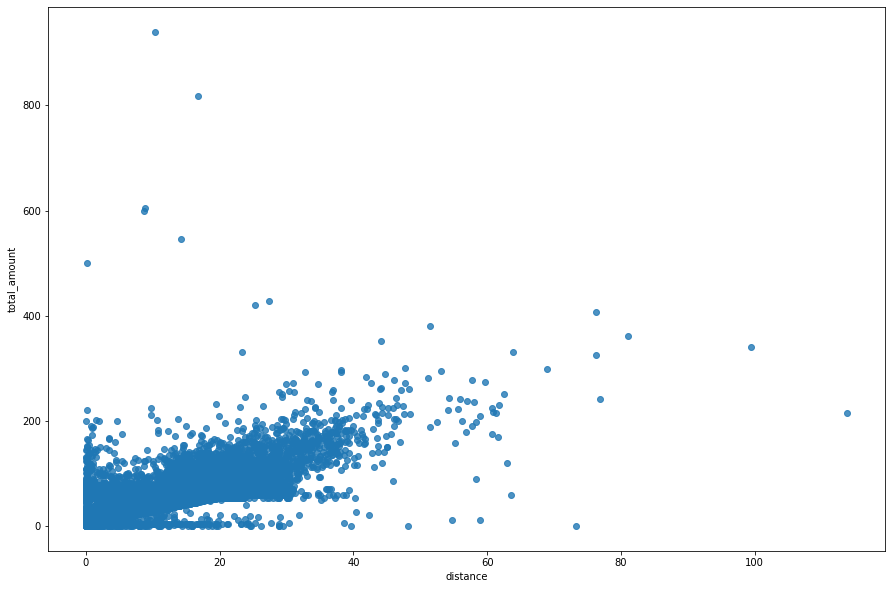

In [30]:
af = df[df['distance']>0]
cor = af['num_passengers']>0
rel = af['total_amount']>0
af[cor & rel]
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax=sns.regplot(x="distance",y="total_amount",fit_reg=False,ci=None,truncate=True,data=af)

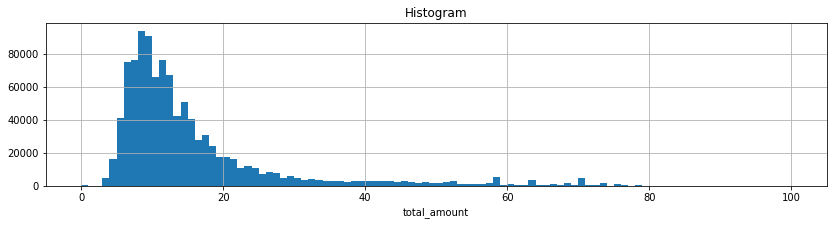

In [31]:
# plot histogram of fare
df[df.total_amount<100].total_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('total_amount')
plt.title('Histogram');

In the histogram of the total_amount there are some small spikes between 60 and 80. This could indicate some fixed fare price (e.g. to/from airport).

Histograms are drawn to observe whether the given dataset is uniform or not

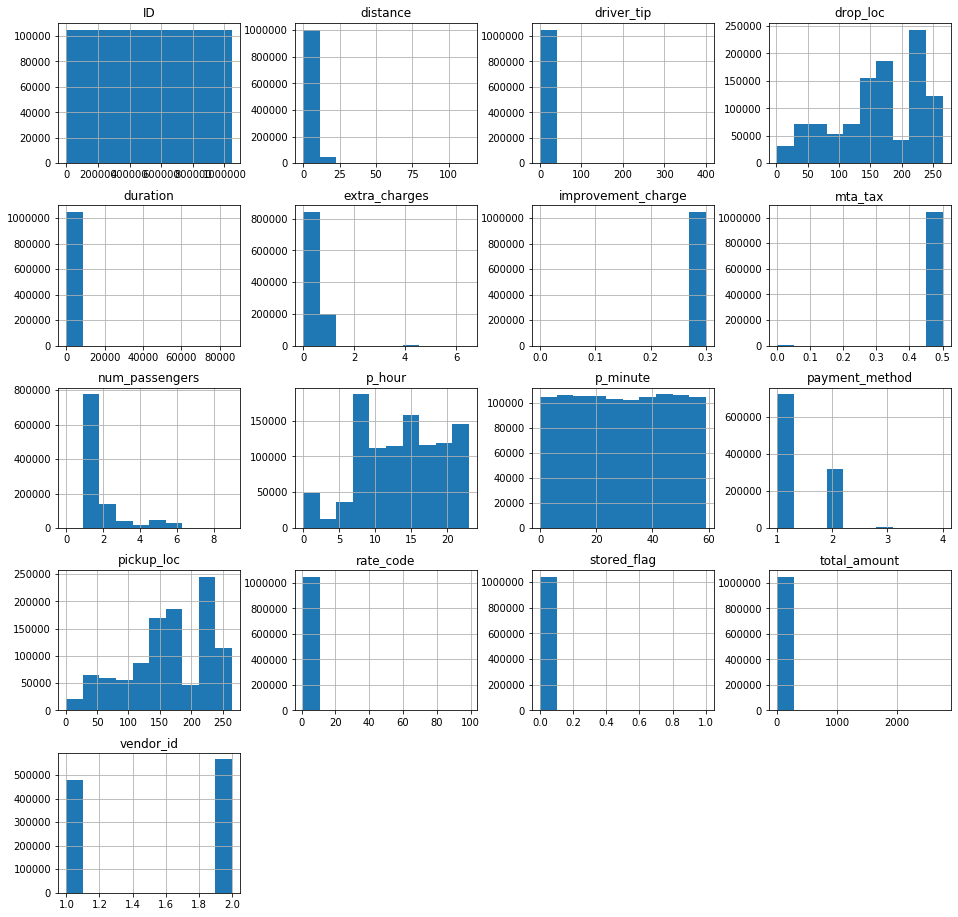

In [32]:
df.hist(figsize=(16,16))
plt.show()

In [33]:
df['driver_tip'].value_counts()

0.00     351304
1.00      64393
2.00      34024
1.50      14669
3.00      10931
          ...  
4.27          1
15.94         1
15.34         1
8.98          1
6.92          1
Name: driver_tip, Length: 2135, dtype: int64

In [34]:
df['improvement_charge'].value_counts()

0.3    1048289
0.0        284
Name: improvement_charge, dtype: int64

In [35]:
df['mta_tax'].value_counts()

0.5    1043304
0.0       5269
Name: mta_tax, dtype: int64

In [36]:
df['rate_code'].value_counts()

1.0     1019630
2.0       22328
5.0        3431
3.0        2522
4.0         628
99.0         25
6.0           9
Name: rate_code, dtype: int64

In [37]:
df['stored_flag'].value_counts()

0    1041404
1       7169
Name: stored_flag, dtype: int64

In [38]:
df['toll_amount'].value_counts()

0        991571
5.76      51323
10.5       1106
5.54        669
12.5        606
          ...  
5.08          1
26            1
13.7          1
30.26         1
19.8          1
Name: toll_amount, Length: 417, dtype: int64

In [39]:
df['vendor_id'].value_counts()

2    567766
1    480807
Name: vendor_id, dtype: int64

In [40]:
cols = ['ID','improvement_charge'] #dropping
df = df.drop(columns = cols)
pf = pf.drop(columns = cols)

# Heat Map

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

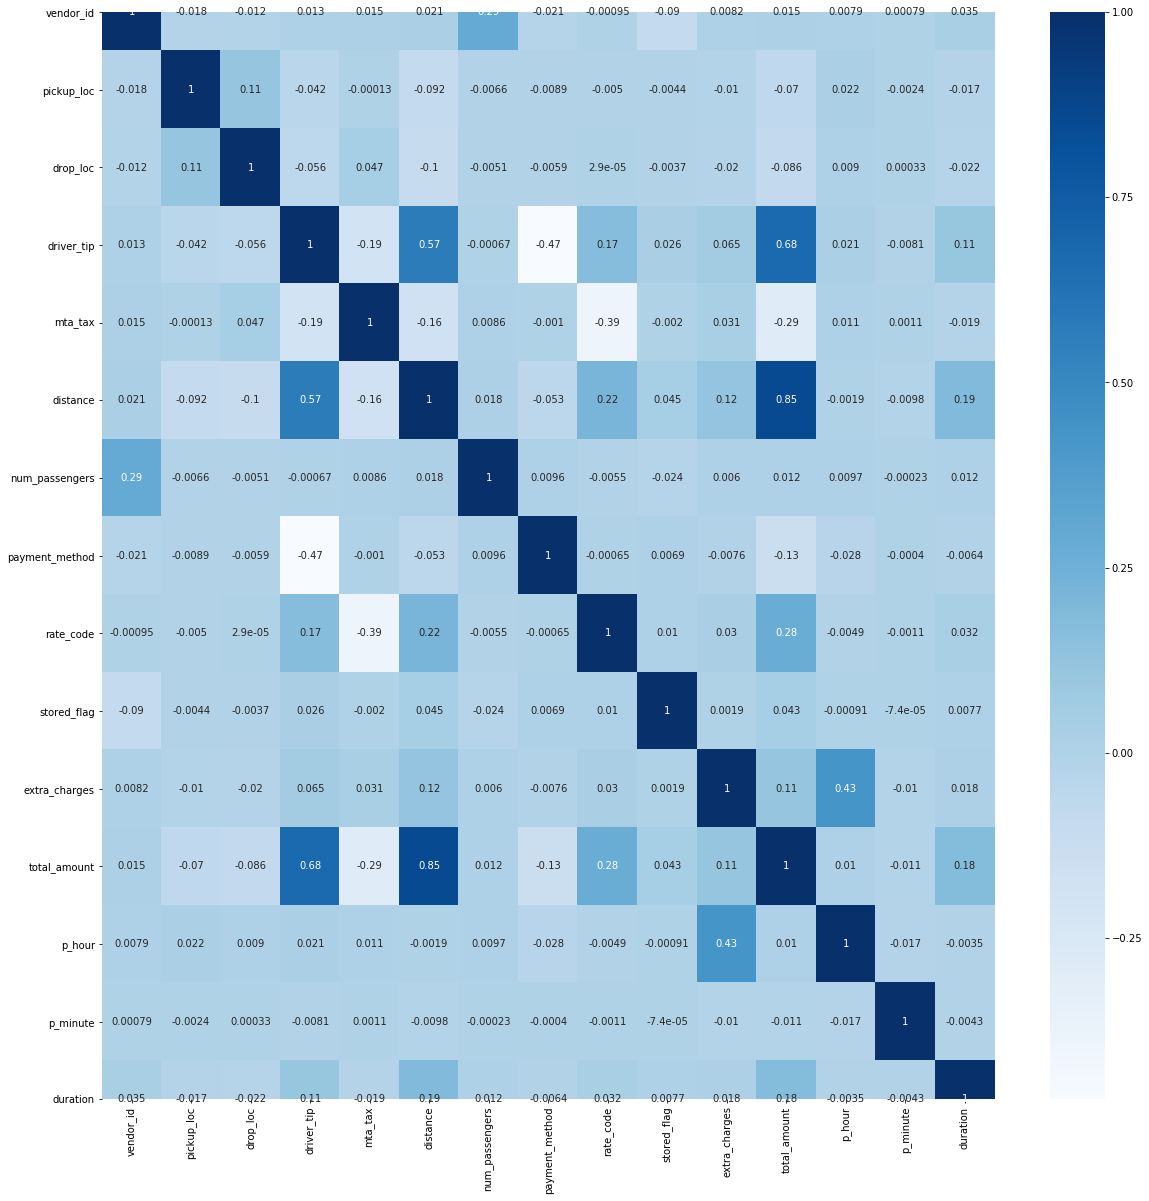

In [41]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Text(0, 0.5, 'total_amount')

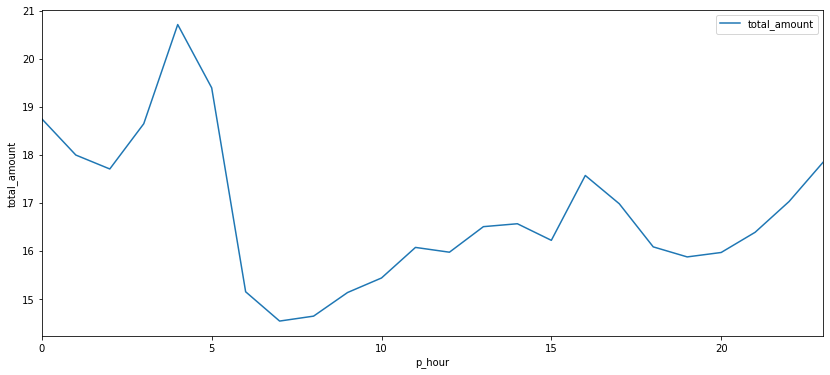

In [42]:
# display pivot table
df.pivot_table('total_amount', index='p_hour').plot(figsize=(14,6))
plt.ylabel('total_amount')

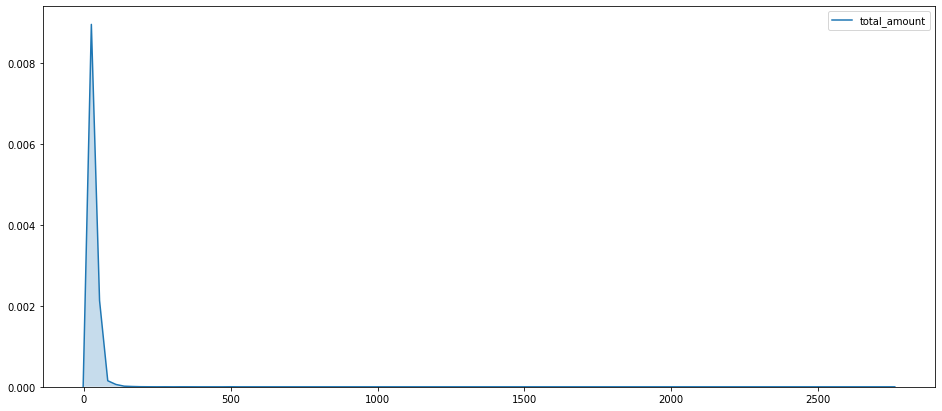

In [43]:
plt.figure(figsize=(16,7))
sns.kdeplot(df['total_amount'],shade=True)
plt.show()

In [44]:
df.shape

(1048573, 16)

In [45]:
df = df[df.total_amount<200]

In [46]:
df = df[df['rate_code']!=99] #rate_code 99 doesn't exit

### If pickup_loc and drop_loc is same and if duration is >0 then their must some distance travelled

In [47]:
df.drop(df[(df['pickup_loc']==df['drop_loc']) & df['duration']>0 & (df['distance']==0) ].index, inplace = True)

In [48]:
df.shape

(977912, 16)

## Splitting Data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop('total_amount',axis=1)

In [51]:
X.head()

,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,p_hour,p_minute,duration
0,1,170.0,233.0,1.83,0.5,0.70,1.0,0,1.0,1.0,0,1.0,17,59,321.0
1,2,151.0,243.0,3.56,0.5,4.64,1.0,0,1.0,1.0,0,1.0,19,3,990.0
2,2,68.0,90.0,1.50,0.5,1.29,2.0,0,1.0,1.0,0,0.0,15,6,377.0
3,2,142.0,234.0,1.50,0.5,2.74,1.0,0,1.0,1.0,0,0.0,8,10,968.0
5,1,230.0,48.0,1.05,0.5,0.40,1.0,0,1.0,1.0,0,0.0,9,10,116.0


In [52]:
y = df.total_amount

In [53]:
y.head()

0     9.13
1    21.36
2     8.80
3    14.80
5     5.35
Name: total_amount, dtype: float64

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

# 1.Using Linear Regression and calculating MSE

In [55]:
#sklearn for importing our model
from sklearn.linear_model import LinearRegression

In [56]:
model1=LinearRegression().fit(X_train,y_train)

In [57]:
pred1 = model1.predict(X_test)

In [58]:
 print(pred1)

[ 8.89638221 28.43752971 10.9929811  ... 15.60647997 22.29034878
 22.61506735]


In [59]:
 mean_squared_error(y_test, pred1)

10.235341239152383

# Using Random Forest Regressor and calculating MSE

In [60]:
from sklearn.ensemble import RandomForestRegressor 

In [61]:
model2=RandomForestRegressor(max_depth=10,random_state=0)

In [62]:
model2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [63]:
pred2 = model2.predict(X_test)

In [64]:
mean_squared_error(y_test, pred2)

2.470794602389511

In [65]:
print(pred2)

[ 7.29761777 30.98854184 11.09068727 ... 15.738832   19.76129632
 35.68724861]


# Using Gradient Boosting Regressor and calculating MSE

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
model3=GradientBoostingRegressor(max_depth=3,random_state=0)

In [68]:
model3.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [69]:
pred3 = model3.predict(X_test)

In [70]:
mean_squared_error(y_test, pred2)

2.470794602389511

# Creating Submission File

In [71]:
# pred3.shape

In [72]:
# yy=[]
# for i in range(154235):
#     yy.append(i)

In [73]:
# predi=pd.DataFrame(pred3)
# predi.rename(columns={0:'total_amount'},inplace=True)
# predi['ID']=yy
# predi = predi[['ID','total_amount']]

In [74]:
# predi.to_csv('final7.csv',index=False)